In [3]:
# Perceptrons are mostly SGDClassifier
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int)
per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2,0.5]])
sum(y_pred==y)/len(y)

0.6666666666666666

In [4]:
import tensorflow as tf
from tensorflow import kerass

In [5]:
tf.__version__

'2.4.1'

In [6]:
keras.__version__

'2.4.0'

In [11]:
# train model on fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [12]:
X_train_full.shape

(60000, 28, 28)

In [13]:
split_idx = 5000
# scale input between 0 and 1 for ANN
X_valid, X_train = X_train_full[split_idx:] / 255.0, X_train_full[:split_idx] / 255.0
y_valid, y_train = y_train_full[split_idx:], y_train_full[:split_idx]
X_test = X_test / 255.0

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", 
              "Sneaker", "Bag", "Ankle Boot"]

Ankle Boot


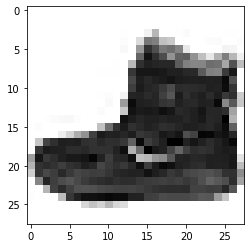

T-shirt/top


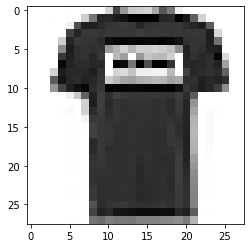

T-shirt/top


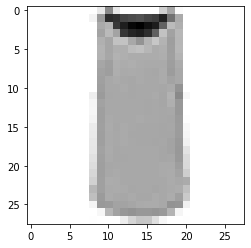

Dress


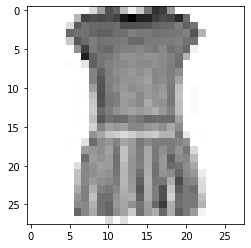

T-shirt/top


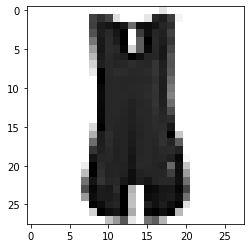

Pullover


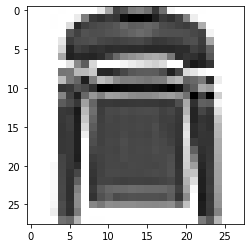

Sneaker


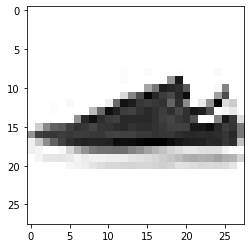

Pullover


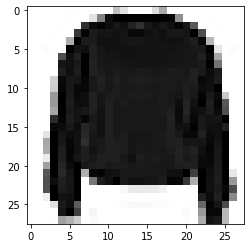

Sandal


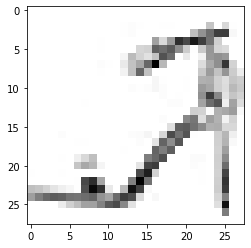

Sandal


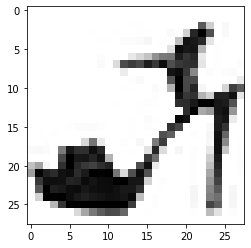

In [20]:
import matplotlib.pyplot as plt
for i in range(10):
    print(class_names[y_train[i]])
    plt.imshow(X_train[i]*255.0, cmap='binary')
    plt.show()

In [47]:
# build ANN with an input layer, 2 hidden layers and an output layer
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [48]:
# model summary including names, number of parameters and such
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [49]:
# get the layers
model.layers

In [50]:
# interact with layer
hidden1 = model.layers[1]
hidden1.name

'dense_6'

In [51]:
# pull layer by name
model.get_layer('dense') is hidden1

ValueError: No such layer: dense.

In [52]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.00885174,  0.03907685, -0.0370528 , ..., -0.01935455,
        -0.03164839, -0.0313753 ],
       [ 0.05053275, -0.06022727, -0.07260013, ..., -0.00131225,
         0.02912233,  0.04286698],
       [ 0.02549671, -0.02701094,  0.06016749, ..., -0.04620617,
        -0.05459857, -0.07266682],
       ...,
       [-0.04763137,  0.02742849, -0.03637039, ..., -0.07142267,
        -0.06651019,  0.01428363],
       [ 0.00034058,  0.02877813,  0.03071857, ...,  0.0489044 ,
        -0.02312174, -0.02569502],
       [-0.03132601, -0.02471223,  0.06598231, ..., -0.05731454,
         0.03325092, -0.00361182]], dtype=float32)

In [53]:
weights.shape

(784, 300)

In [54]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [55]:
biases.shape

(300,)

In [56]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [57]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_valid, y_valid))

Epoch 1/500
157/157 [==============================] - 2s 10ms/step - loss: 1.8255 - accuracy: 0.4377 - val_loss: 1.0578 - val_accuracy: 0.6824
Epoch 2/500
157/157 [==============================] - 1s 9ms/step - loss: 0.9295 - accuracy: 0.7208 - val_loss: 0.8330 - val_accuracy: 0.7289
Epoch 3/500
157/157 [==============================] - 1s 10ms/step - loss: 0.7373 - accuracy: 0.7668 - val_loss: 0.8052 - val_accuracy: 0.7072
Epoch 4/500
157/157 [==============================] - 1s 9ms/step - loss: 0.6744 - accuracy: 0.7846 - val_loss: 0.6548 - val_accuracy: 0.7858
Epoch 5/500
157/157 [==============================] - 2s 10ms/step - loss: 0.6130 - accuracy: 0.8042 - val_loss: 0.6275 - val_accuracy: 0.7898
Epoch 6/500
157/157 [==============================] - 2s 10ms/step - loss: 0.5827 - accuracy: 0.8153 - val_loss: 0.6283 - val_accuracy: 0.7848
Epoch 7/500
157/157 [==============================] - 1s 10ms/step - loss: 0.5446 - accuracy: 0.8262 - val_loss: 0.6222 - val_accuracy: 0

157/157 [==============================] - 2s 11ms/step - loss: 0.2251 - accuracy: 0.9255 - val_loss: 0.5549 - val_accuracy: 0.8145
Epoch 58/500
157/157 [==============================] - 2s 10ms/step - loss: 0.2429 - accuracy: 0.9165 - val_loss: 0.4653 - val_accuracy: 0.8402
Epoch 59/500
157/157 [==============================] - 2s 10ms/step - loss: 0.2392 - accuracy: 0.9220 - val_loss: 0.4651 - val_accuracy: 0.8459
Epoch 60/500
157/157 [==============================] - 2s 11ms/step - loss: 0.2339 - accuracy: 0.9255 - val_loss: 0.7205 - val_accuracy: 0.7877
Epoch 61/500
157/157 [==============================] - 2s 11ms/step - loss: 0.2080 - accuracy: 0.9326 - val_loss: 0.4586 - val_accuracy: 0.8466
Epoch 62/500
157/157 [==============================] - 2s 10ms/step - loss: 0.2191 - accuracy: 0.9244 - val_loss: 0.4484 - val_accuracy: 0.8507
Epoch 63/500
157/157 [==============================] - 2s 10ms/step - loss: 0.2162 - accuracy: 0.9287 - val_loss: 0.4785 - val_accuracy: 0.839

157/157 [==============================] - 2s 11ms/step - loss: 0.1038 - accuracy: 0.9729 - val_loss: 0.5106 - val_accuracy: 0.8482
Epoch 114/500
157/157 [==============================] - 2s 10ms/step - loss: 0.1091 - accuracy: 0.9686 - val_loss: 0.5120 - val_accuracy: 0.8504
Epoch 115/500
157/157 [==============================] - 2s 10ms/step - loss: 0.0998 - accuracy: 0.9733 - val_loss: 0.5610 - val_accuracy: 0.8319
Epoch 116/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0973 - accuracy: 0.9778 - val_loss: 0.5025 - val_accuracy: 0.8499
Epoch 117/500
157/157 [==============================] - 2s 10ms/step - loss: 0.1045 - accuracy: 0.9706 - val_loss: 0.5790 - val_accuracy: 0.8390
Epoch 118/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0932 - accuracy: 0.9752 - val_loss: 0.5275 - val_accuracy: 0.8451
Epoch 119/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0947 - accuracy: 0.9745 - val_loss: 0.5655 - val_accuracy:

157/157 [==============================] - 2s 12ms/step - loss: 0.0374 - accuracy: 0.9936 - val_loss: 0.5931 - val_accuracy: 0.8483
Epoch 170/500
157/157 [==============================] - 2s 12ms/step - loss: 0.0348 - accuracy: 0.9966 - val_loss: 0.6464 - val_accuracy: 0.8379
Epoch 171/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0361 - accuracy: 0.9945 - val_loss: 0.6891 - val_accuracy: 0.8269
Epoch 172/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0446 - accuracy: 0.9904 - val_loss: 0.6031 - val_accuracy: 0.8455
Epoch 173/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0355 - accuracy: 0.9945 - val_loss: 0.6166 - val_accuracy: 0.8410
Epoch 174/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0327 - accuracy: 0.9967 - val_loss: 0.5938 - val_accuracy: 0.8483
Epoch 175/500
157/157 [==============================] - 2s 12ms/step - loss: 0.0344 - accuracy: 0.9942 - val_loss: 0.6042 - val_accuracy:

157/157 [==============================] - 2s 10ms/step - loss: 0.0141 - accuracy: 0.9996 - val_loss: 0.6728 - val_accuracy: 0.8473
Epoch 226/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.6852 - val_accuracy: 0.8442
Epoch 227/500
157/157 [==============================] - 2s 10ms/step - loss: 0.0136 - accuracy: 0.9999 - val_loss: 0.6756 - val_accuracy: 0.8476
Epoch 228/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.6850 - val_accuracy: 0.8450
Epoch 229/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0149 - accuracy: 0.9987 - val_loss: 0.6725 - val_accuracy: 0.8479
Epoch 230/500
157/157 [==============================] - 2s 10ms/step - loss: 0.0119 - accuracy: 0.9999 - val_loss: 0.6826 - val_accuracy: 0.8482
Epoch 231/500
157/157 [==============================] - 2s 10ms/step - loss: 0.0138 - accuracy: 0.9999 - val_loss: 0.6903 - val_accuracy:

157/157 [==============================] - 2s 11ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.7316 - val_accuracy: 0.8461
Epoch 282/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.7287 - val_accuracy: 0.8478
Epoch 283/500
157/157 [==============================] - 2s 12ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.7293 - val_accuracy: 0.8471
Epoch 284/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.7283 - val_accuracy: 0.8477
Epoch 285/500
157/157 [==============================] - 2s 12ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.7314 - val_accuracy: 0.8479
Epoch 286/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.7333 - val_accuracy: 0.8470
Epoch 287/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.7367 - val_accuracy:

157/157 [==============================] - 2s 11ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.7724 - val_accuracy: 0.8472
Epoch 338/500
157/157 [==============================] - 2s 10ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.7876 - val_accuracy: 0.8453
Epoch 339/500
157/157 [==============================] - 2s 13ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.7735 - val_accuracy: 0.8469
Epoch 340/500
157/157 [==============================] - 2s 12ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.7740 - val_accuracy: 0.8473
Epoch 341/500
157/157 [==============================] - 2s 13ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.7746 - val_accuracy: 0.8469
Epoch 342/500
157/157 [==============================] - 2s 12ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.7742 - val_accuracy: 0.8467
Epoch 343/500
157/157 [==============================] - 2s 12ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.7789 - val_accuracy:

157/157 [==============================] - 2s 10ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.8056 - val_accuracy: 0.8471
Epoch 394/500
157/157 [==============================] - 2s 10ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.8056 - val_accuracy: 0.8471
Epoch 395/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.8072 - val_accuracy: 0.8472
Epoch 396/500
157/157 [==============================] - 2s 10ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.8108 - val_accuracy: 0.8460
Epoch 397/500
157/157 [==============================] - 2s 10ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.8085 - val_accuracy: 0.8464
Epoch 398/500
157/157 [==============================] - 2s 10ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.8091 - val_accuracy: 0.8465
Epoch 399/500
157/157 [==============================] - 2s 10ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.8121 - val_accuracy:

157/157 [==============================] - 2s 10ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.8342 - val_accuracy: 0.8465
Epoch 450/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.8351 - val_accuracy: 0.8465
Epoch 451/500
157/157 [==============================] - 2s 11ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.8368 - val_accuracy: 0.8467
Epoch 452/500
157/157 [==============================] - 2s 10ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.8349 - val_accuracy: 0.8468
Epoch 453/500
157/157 [==============================] - 2s 10ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.8361 - val_accuracy: 0.8473
Epoch 454/500
157/157 [==============================] - 2s 10ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.8374 - val_accuracy: 0.8471
Epoch 455/500
157/157 [==============================] - 2s 10ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.8384 - val_accuracy:

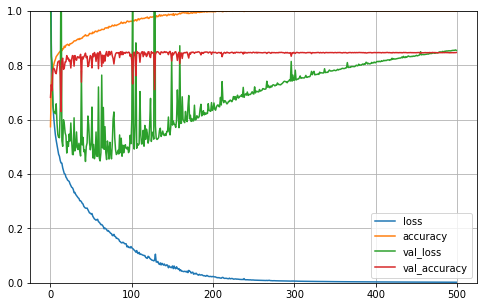

In [65]:
# look at how learning progressed over time
import pandas as pd
import matplotlib.pyplot as plt

def plot_history(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_history(history)

In [59]:
# once your happy look at how it generalizes
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 864us/step - loss: 0.9558 - accuracy: 0.8329


[0.955818235874176, 0.8328999876976013]

In [60]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [61]:
y_pred = model.predict_classes(X_new)
y_pred

/Users/joelvenzke/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [62]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [63]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [64]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# get data
housing = fetch_california_housing()
# split data
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# scale input
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [73]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]), 
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid))

Epoch 1/1000
363/363 [==============================] - 1s 1ms/step - loss: 1.2580 - val_loss: 3.4465
Epoch 2/1000
363/363 [==============================] - 0s 706us/step - loss: 0.5222 - val_loss: 0.8915
Epoch 3/1000
363/363 [==============================] - 0s 720us/step - loss: 0.4077 - val_loss: 0.5486
Epoch 4/1000
363/363 [==============================] - 0s 766us/step - loss: 0.4184 - val_loss: 0.4828
Epoch 5/1000
363/363 [==============================] - 0s 724us/step - loss: 0.4200 - val_loss: 0.4878
Epoch 6/1000
363/363 [==============================] - 0s 768us/step - loss: 0.3919 - val_loss: 0.5344
Epoch 7/1000
363/363 [==============================] - 0s 772us/step - loss: 0.5501 - val_loss: 0.4738
Epoch 8/1000
363/363 [==============================] - 0s 725us/step - loss: 0.3863 - val_loss: 0.4587
Epoch 9/1000
363/363 [==============================] - 0s 712us/step - loss: 0.3976 - val_loss: 0.4533
Epoch 10/1000
363/363 [==============================] - 0s 737us/

363/363 [==============================] - 0s 735us/step - loss: 0.3122 - val_loss: 0.3417
Epoch 80/1000
363/363 [==============================] - 0s 699us/step - loss: 0.3160 - val_loss: 0.3506
Epoch 81/1000
363/363 [==============================] - 0s 702us/step - loss: 0.3153 - val_loss: 0.3647
Epoch 82/1000
363/363 [==============================] - 0s 707us/step - loss: 0.3201 - val_loss: 0.3710
Epoch 83/1000
363/363 [==============================] - 0s 721us/step - loss: 0.3084 - val_loss: 0.3679
Epoch 84/1000
363/363 [==============================] - 0s 737us/step - loss: 0.3131 - val_loss: 0.3749
Epoch 85/1000
363/363 [==============================] - 0s 712us/step - loss: 0.3187 - val_loss: 0.3431
Epoch 86/1000
363/363 [==============================] - 0s 725us/step - loss: 0.3196 - val_loss: 0.3376
Epoch 87/1000
363/363 [==============================] - 0s 696us/step - loss: 0.3155 - val_loss: 0.3405
Epoch 88/1000
363/363 [==============================] - 0s 699us/ste

363/363 [==============================] - 0s 748us/step - loss: 0.3182 - val_loss: 0.3259
Epoch 157/1000
363/363 [==============================] - 0s 686us/step - loss: 0.3065 - val_loss: 0.3137
Epoch 158/1000
363/363 [==============================] - 0s 700us/step - loss: 0.2995 - val_loss: 0.4032
Epoch 159/1000
363/363 [==============================] - 0s 702us/step - loss: 0.2899 - val_loss: 1.7588
Epoch 160/1000
363/363 [==============================] - 0s 736us/step - loss: 0.2953 - val_loss: 0.8214
Epoch 161/1000
363/363 [==============================] - 0s 747us/step - loss: 0.2931 - val_loss: 0.3451
Epoch 162/1000
363/363 [==============================] - 0s 688us/step - loss: 0.3055 - val_loss: 0.3154
Epoch 163/1000
363/363 [==============================] - 0s 698us/step - loss: 0.2994 - val_loss: 0.3429
Epoch 164/1000
363/363 [==============================] - 0s 744us/step - loss: 0.3044 - val_loss: 1.6510
Epoch 165/1000
363/363 [==============================] - 0s 

363/363 [==============================] - 0s 721us/step - loss: 0.2946 - val_loss: 0.3674
Epoch 234/1000
363/363 [==============================] - 0s 693us/step - loss: 0.3102 - val_loss: 0.3932
Epoch 235/1000
363/363 [==============================] - 0s 716us/step - loss: 0.2870 - val_loss: 0.3906
Epoch 236/1000
363/363 [==============================] - 0s 689us/step - loss: 0.2917 - val_loss: 0.3307
Epoch 237/1000
363/363 [==============================] - 0s 692us/step - loss: 0.2843 - val_loss: 0.3576
Epoch 238/1000
363/363 [==============================] - 0s 696us/step - loss: 0.2767 - val_loss: 0.4823
Epoch 239/1000
363/363 [==============================] - 0s 768us/step - loss: 0.3001 - val_loss: 0.3735
Epoch 240/1000
363/363 [==============================] - 0s 698us/step - loss: 0.2927 - val_loss: 0.4108
Epoch 241/1000
363/363 [==============================] - 0s 718us/step - loss: 0.3006 - val_loss: 0.7366
Epoch 242/1000
363/363 [==============================] - 0s 

363/363 [==============================] - 0s 785us/step - loss: 0.2905 - val_loss: 0.5092
Epoch 311/1000
363/363 [==============================] - 0s 782us/step - loss: 0.2959 - val_loss: 0.3282
Epoch 312/1000
363/363 [==============================] - 0s 754us/step - loss: 0.3055 - val_loss: 0.4896
Epoch 313/1000
363/363 [==============================] - 0s 798us/step - loss: 0.2888 - val_loss: 0.3310
Epoch 314/1000
363/363 [==============================] - 0s 792us/step - loss: 0.2942 - val_loss: 0.4663
Epoch 315/1000
363/363 [==============================] - 0s 822us/step - loss: 0.2934 - val_loss: 0.5682
Epoch 316/1000
363/363 [==============================] - 0s 826us/step - loss: 0.2944 - val_loss: 0.4455
Epoch 317/1000
363/363 [==============================] - 0s 752us/step - loss: 0.2986 - val_loss: 0.3164
Epoch 318/1000
363/363 [==============================] - 0s 756us/step - loss: 0.2907 - val_loss: 0.6609
Epoch 319/1000
363/363 [==============================] - 0s 

363/363 [==============================] - 0s 743us/step - loss: 0.3214 - val_loss: 0.3178
Epoch 388/1000
363/363 [==============================] - 0s 722us/step - loss: 0.2964 - val_loss: 0.5497
Epoch 389/1000
363/363 [==============================] - 0s 752us/step - loss: 0.2903 - val_loss: 0.3291
Epoch 390/1000
363/363 [==============================] - 0s 757us/step - loss: 0.2808 - val_loss: 1.7847
Epoch 391/1000
363/363 [==============================] - 0s 726us/step - loss: 0.2953 - val_loss: 0.3107
Epoch 392/1000
363/363 [==============================] - 0s 778us/step - loss: 0.2959 - val_loss: 0.3198
Epoch 393/1000
363/363 [==============================] - 0s 739us/step - loss: 0.2912 - val_loss: 0.4169
Epoch 394/1000
363/363 [==============================] - 0s 977us/step - loss: 0.2906 - val_loss: 0.3265
Epoch 395/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.2850 - val_loss: 0.3570
Epoch 396/1000
363/363 [==============================] - 0s 92

363/363 [==============================] - 0s 727us/step - loss: 0.2983 - val_loss: 0.4661
Epoch 465/1000
363/363 [==============================] - 0s 690us/step - loss: 0.3002 - val_loss: 0.3794
Epoch 466/1000
363/363 [==============================] - 1s 2ms/step - loss: 0.2863 - val_loss: 0.4326
Epoch 467/1000
363/363 [==============================] - 0s 699us/step - loss: 0.2892 - val_loss: 0.4039
Epoch 468/1000
363/363 [==============================] - 0s 691us/step - loss: 0.2917 - val_loss: 0.3432
Epoch 469/1000
363/363 [==============================] - 0s 704us/step - loss: 0.2842 - val_loss: 0.4449
Epoch 470/1000
363/363 [==============================] - 0s 698us/step - loss: 0.2871 - val_loss: 0.4014
Epoch 471/1000
363/363 [==============================] - 0s 707us/step - loss: 0.2869 - val_loss: 0.3263
Epoch 472/1000
363/363 [==============================] - 0s 736us/step - loss: 0.2883 - val_loss: 0.4005
Epoch 473/1000
363/363 [==============================] - 0s 69

363/363 [==============================] - 0s 746us/step - loss: 0.2846 - val_loss: 0.4996
Epoch 542/1000
363/363 [==============================] - 0s 704us/step - loss: 0.2841 - val_loss: 0.3604
Epoch 543/1000
363/363 [==============================] - 0s 704us/step - loss: 0.2862 - val_loss: 0.4833
Epoch 544/1000
363/363 [==============================] - 0s 831us/step - loss: 0.2879 - val_loss: 0.3668
Epoch 545/1000
363/363 [==============================] - 0s 713us/step - loss: 0.2813 - val_loss: 0.4605
Epoch 546/1000
363/363 [==============================] - 0s 687us/step - loss: 0.2808 - val_loss: 0.3737
Epoch 547/1000
363/363 [==============================] - 0s 692us/step - loss: 0.2906 - val_loss: 0.3066
Epoch 548/1000
363/363 [==============================] - 0s 702us/step - loss: 0.2842 - val_loss: 0.3945
Epoch 549/1000
363/363 [==============================] - 0s 739us/step - loss: 0.2919 - val_loss: 0.3329
Epoch 550/1000
363/363 [==============================] - 0s 

363/363 [==============================] - 0s 931us/step - loss: 0.2829 - val_loss: 0.2978
Epoch 619/1000
363/363 [==============================] - 0s 874us/step - loss: 0.2855 - val_loss: 0.5709
Epoch 620/1000
363/363 [==============================] - 0s 859us/step - loss: 0.2942 - val_loss: 0.3099
Epoch 621/1000
363/363 [==============================] - 0s 882us/step - loss: 0.2757 - val_loss: 0.5420
Epoch 622/1000
363/363 [==============================] - 0s 888us/step - loss: 0.2951 - val_loss: 0.3125
Epoch 623/1000
363/363 [==============================] - 0s 837us/step - loss: 0.2639 - val_loss: 0.8818
Epoch 624/1000
363/363 [==============================] - 0s 837us/step - loss: 0.2815 - val_loss: 0.3369
Epoch 625/1000
363/363 [==============================] - 0s 879us/step - loss: 0.2825 - val_loss: 0.8832
Epoch 626/1000
363/363 [==============================] - 0s 857us/step - loss: 0.2859 - val_loss: 0.3248
Epoch 627/1000
363/363 [==============================] - 0s 

363/363 [==============================] - 0s 842us/step - loss: 0.2772 - val_loss: 0.3447
Epoch 696/1000
363/363 [==============================] - 0s 847us/step - loss: 0.2790 - val_loss: 0.4806
Epoch 697/1000
363/363 [==============================] - 0s 833us/step - loss: 0.2752 - val_loss: 0.3094
Epoch 698/1000
363/363 [==============================] - 0s 858us/step - loss: 0.2775 - val_loss: 0.3544
Epoch 699/1000
363/363 [==============================] - 0s 855us/step - loss: 0.2742 - val_loss: 0.3566
Epoch 700/1000
363/363 [==============================] - 0s 837us/step - loss: 0.2809 - val_loss: 0.4684
Epoch 701/1000
363/363 [==============================] - 0s 850us/step - loss: 0.2868 - val_loss: 0.6103
Epoch 702/1000
363/363 [==============================] - 0s 852us/step - loss: 0.2832 - val_loss: 0.3038
Epoch 703/1000
363/363 [==============================] - 0s 862us/step - loss: 0.2923 - val_loss: 0.3215
Epoch 704/1000
363/363 [==============================] - 0s 

363/363 [==============================] - 0s 821us/step - loss: 0.2816 - val_loss: 0.3267
Epoch 773/1000
363/363 [==============================] - 0s 811us/step - loss: 0.2875 - val_loss: 0.3440
Epoch 774/1000
363/363 [==============================] - 0s 808us/step - loss: 0.2917 - val_loss: 0.3501
Epoch 775/1000
363/363 [==============================] - 0s 816us/step - loss: 0.2768 - val_loss: 0.3334
Epoch 776/1000
363/363 [==============================] - 0s 836us/step - loss: 0.2831 - val_loss: 0.3272
Epoch 777/1000
363/363 [==============================] - 0s 804us/step - loss: 0.2845 - val_loss: 0.3706
Epoch 778/1000
363/363 [==============================] - 0s 811us/step - loss: 0.2862 - val_loss: 0.3339
Epoch 779/1000
363/363 [==============================] - 0s 828us/step - loss: 0.2765 - val_loss: 0.3555
Epoch 780/1000
363/363 [==============================] - 0s 812us/step - loss: 0.2715 - val_loss: 0.3281
Epoch 781/1000
363/363 [==============================] - 0s 

363/363 [==============================] - 0s 726us/step - loss: 0.2722 - val_loss: 0.3079
Epoch 850/1000
363/363 [==============================] - 0s 710us/step - loss: 0.2753 - val_loss: 0.4039
Epoch 851/1000
363/363 [==============================] - 0s 679us/step - loss: 0.2737 - val_loss: 0.3405
Epoch 852/1000
363/363 [==============================] - 0s 680us/step - loss: 0.2680 - val_loss: 0.3700
Epoch 853/1000
363/363 [==============================] - 0s 801us/step - loss: 0.2641 - val_loss: 0.3101
Epoch 854/1000
363/363 [==============================] - 0s 724us/step - loss: 0.2722 - val_loss: 0.5576
Epoch 855/1000
363/363 [==============================] - 0s 710us/step - loss: 0.3093 - val_loss: 0.2977
Epoch 856/1000
363/363 [==============================] - 0s 702us/step - loss: 0.2813 - val_loss: 0.3455
Epoch 857/1000
363/363 [==============================] - 0s 735us/step - loss: 0.2660 - val_loss: 0.3101
Epoch 858/1000
363/363 [==============================] - 0s 

363/363 [==============================] - 0s 718us/step - loss: 0.2688 - val_loss: 0.3227
Epoch 927/1000
363/363 [==============================] - 0s 684us/step - loss: 0.2689 - val_loss: 0.3219
Epoch 928/1000
363/363 [==============================] - 0s 680us/step - loss: 0.2775 - val_loss: 0.3181
Epoch 929/1000
363/363 [==============================] - 0s 684us/step - loss: 0.2708 - val_loss: 0.3464
Epoch 930/1000
363/363 [==============================] - 0s 696us/step - loss: 0.2532 - val_loss: 0.3045
Epoch 931/1000
363/363 [==============================] - 0s 783us/step - loss: 0.2736 - val_loss: 0.3961
Epoch 932/1000
363/363 [==============================] - 0s 699us/step - loss: 0.2732 - val_loss: 0.3784
Epoch 933/1000
363/363 [==============================] - 0s 719us/step - loss: 0.2666 - val_loss: 0.3248
Epoch 934/1000
363/363 [==============================] - 0s 714us/step - loss: 0.2807 - val_loss: 0.3489
Epoch 935/1000
363/363 [==============================] - 0s 

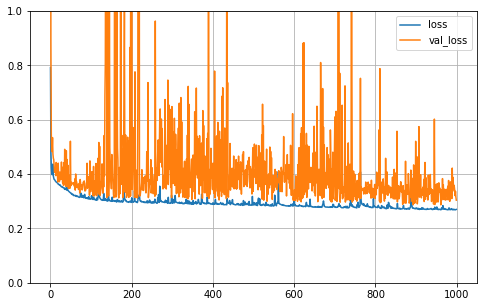

162/162 [==============================] - 0s 468us/step - loss: 0.2886
0.2886277437210083
[1.1894528 0.257485  2.3910258]
[1.543 0.44  3.25 ]


In [74]:
plot_history(history)
mse_test = model.evaluate(X_test,y_test)
print(mse_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred.ravel())
print(y_test[:3])

In [76]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])


In [78]:
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3242 - val_loss: 0.6977
Epoch 2/100
363/363 [==============================] - 0s 974us/step - loss: 0.3488 - val_loss: 0.4144
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3340 - val_loss: 0.3685
Epoch 4/100
363/363 [==============================] - 0s 957us/step - loss: 0.3319 - val_loss: 0.4065
Epoch 5/100
363/363 [==============================] - 0s 962us/step - loss: 0.3241 - val_loss: 0.8093
Epoch 6/100
363/363 [==============================] - 0s 988us/step - loss: 0.3629 - val_loss: 0.7729
Epoch 7/100
363/363 [==============================] - 0s 946us/step - loss: 0.3382 - val_loss: 1.7482
Epoch 8/100
363/363 [==============================] - 0s 944us/step - loss: 0.3317 - val_loss: 0.5456
Epoch 9/100
363/363 [==============================] - 0s 998us/step - loss: 0.3505 - val_loss: 0.3695
Epoch 10/100
363/363 [==============================] - 0s 994us/step - loss:

363/363 [==============================] - 0s 903us/step - loss: 0.2594 - val_loss: 0.4768
Epoch 81/100
363/363 [==============================] - 0s 848us/step - loss: 0.2688 - val_loss: 0.2969
Epoch 82/100
363/363 [==============================] - 0s 871us/step - loss: 0.2776 - val_loss: 0.2919
Epoch 83/100
363/363 [==============================] - 0s 914us/step - loss: 0.2668 - val_loss: 0.3236
Epoch 84/100
363/363 [==============================] - 0s 871us/step - loss: 0.2681 - val_loss: 0.6217
Epoch 85/100
363/363 [==============================] - 0s 909us/step - loss: 0.2621 - val_loss: 0.3536
Epoch 86/100
363/363 [==============================] - 0s 910us/step - loss: 0.2752 - val_loss: 0.5695
Epoch 87/100
363/363 [==============================] - 0s 862us/step - loss: 0.2874 - val_loss: 0.3978
Epoch 88/100
363/363 [==============================] - 0s 872us/step - loss: 0.2644 - val_loss: 0.3348
Epoch 89/100
363/363 [==============================] - 0s 921us/step - loss:

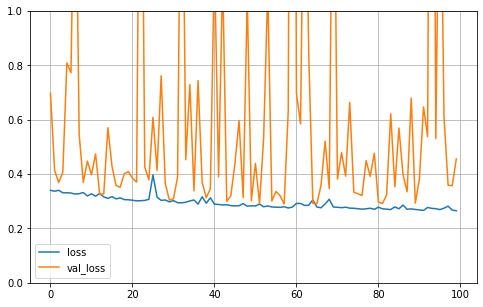

162/162 [==============================] - 0s 468us/step - loss: 0.3204
0.32044172286987305
[1.1489946  0.44921923 2.320016  ]
[1.543 0.44  3.25 ]


In [79]:
plot_history(history)
mse_test = model.evaluate(X_test,y_test)
print(mse_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred.ravel())
print(y_test[:3])

In [80]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 30)           930         dense_20[0][0]                   
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_2[0][0]                    
                                                                 dense_21[0][0]               

In [94]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_A)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [95]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), 
                    y_train, 
                    epochs=1000, 
                    validation_data=((X_valid_A, X_valid_B), y_valid))


Epoch 1/1000
363/363 [==============================] - 1s 1ms/step - loss: 2.2653 - val_loss: 0.8223
Epoch 2/1000
363/363 [==============================] - 0s 987us/step - loss: 0.7894 - val_loss: 0.7451
Epoch 3/1000
363/363 [==============================] - 0s 856us/step - loss: 0.7099 - val_loss: 0.7088
Epoch 4/1000
363/363 [==============================] - 0s 832us/step - loss: 0.6925 - val_loss: 0.6843
Epoch 5/1000
363/363 [==============================] - 0s 864us/step - loss: 0.6503 - val_loss: 0.6677
Epoch 6/1000
363/363 [==============================] - 0s 859us/step - loss: 0.6447 - val_loss: 0.6562
Epoch 7/1000
363/363 [==============================] - 0s 947us/step - loss: 0.6174 - val_loss: 0.6461
Epoch 8/1000
363/363 [==============================] - 0s 918us/step - loss: 0.6010 - val_loss: 0.6383
Epoch 9/1000
363/363 [==============================] - 1s 2ms/step - loss: 0.6174 - val_loss: 0.6337
Epoch 10/1000
363/363 [==============================] - 0s 993us/st

363/363 [==============================] - 0s 1ms/step - loss: 0.5075 - val_loss: 0.5463
Epoch 80/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.5230 - val_loss: 0.5467
Epoch 81/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.5132 - val_loss: 0.5456
Epoch 82/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.4946 - val_loss: 0.5445
Epoch 83/1000
363/363 [==============================] - 0s 980us/step - loss: 0.4972 - val_loss: 0.5445
Epoch 84/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.5114 - val_loss: 0.5450
Epoch 85/1000
363/363 [==============================] - 0s 994us/step - loss: 0.5142 - val_loss: 0.5448
Epoch 86/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.5135 - val_loss: 0.5438
Epoch 87/1000
363/363 [==============================] - 0s 991us/step - loss: 0.4978 - val_loss: 0.5436
Epoch 88/1000
363/363 [==============================] - 0s 865us/step - loss: 0.

Epoch 157/1000
363/363 [==============================] - 0s 825us/step - loss: 0.5012 - val_loss: 0.5352
Epoch 158/1000
363/363 [==============================] - 0s 856us/step - loss: 0.4947 - val_loss: 0.5367
Epoch 159/1000
363/363 [==============================] - 0s 796us/step - loss: 0.4836 - val_loss: 0.5351
Epoch 160/1000
363/363 [==============================] - 0s 868us/step - loss: 0.4933 - val_loss: 0.5351
Epoch 161/1000
363/363 [==============================] - 0s 848us/step - loss: 0.4762 - val_loss: 0.5352
Epoch 162/1000
363/363 [==============================] - 0s 818us/step - loss: 0.4698 - val_loss: 0.5351
Epoch 163/1000
363/363 [==============================] - 0s 843us/step - loss: 0.4872 - val_loss: 0.5353
Epoch 164/1000
363/363 [==============================] - 0s 836us/step - loss: 0.4748 - val_loss: 0.5344
Epoch 165/1000
363/363 [==============================] - 0s 893us/step - loss: 0.5026 - val_loss: 0.5355
Epoch 166/1000
363/363 [======================

363/363 [==============================] - 0s 893us/step - loss: 0.4970 - val_loss: 0.5346
Epoch 235/1000
363/363 [==============================] - 0s 825us/step - loss: 0.4842 - val_loss: 0.5343
Epoch 236/1000
363/363 [==============================] - 0s 843us/step - loss: 0.4940 - val_loss: 0.5351
Epoch 237/1000
363/363 [==============================] - 0s 867us/step - loss: 0.4860 - val_loss: 0.5336
Epoch 238/1000
363/363 [==============================] - 0s 884us/step - loss: 0.4784 - val_loss: 0.5333
Epoch 239/1000
363/363 [==============================] - 0s 846us/step - loss: 0.4812 - val_loss: 0.5339
Epoch 240/1000
363/363 [==============================] - 0s 910us/step - loss: 0.4760 - val_loss: 0.5344
Epoch 241/1000
363/363 [==============================] - 0s 823us/step - loss: 0.4802 - val_loss: 0.5337
Epoch 242/1000
363/363 [==============================] - 0s 891us/step - loss: 0.4921 - val_loss: 0.5330
Epoch 243/1000
363/363 [==============================] - 0s 

363/363 [==============================] - 0s 840us/step - loss: 0.4783 - val_loss: 0.5341
Epoch 312/1000
363/363 [==============================] - 0s 816us/step - loss: 0.4872 - val_loss: 0.5327
Epoch 313/1000
363/363 [==============================] - 0s 877us/step - loss: 0.4789 - val_loss: 0.5327
Epoch 314/1000
363/363 [==============================] - 0s 844us/step - loss: 0.4815 - val_loss: 0.5319
Epoch 315/1000
363/363 [==============================] - 0s 839us/step - loss: 0.4878 - val_loss: 0.5321
Epoch 316/1000
363/363 [==============================] - 0s 905us/step - loss: 0.4699 - val_loss: 0.5326
Epoch 317/1000
363/363 [==============================] - 0s 924us/step - loss: 0.4866 - val_loss: 0.5326
Epoch 318/1000
363/363 [==============================] - 0s 969us/step - loss: 0.4755 - val_loss: 0.5326
Epoch 319/1000
363/363 [==============================] - 0s 962us/step - loss: 0.4698 - val_loss: 0.5322
Epoch 320/1000
363/363 [==============================] - 0s 

363/363 [==============================] - 0s 880us/step - loss: 0.4749 - val_loss: 0.5329
Epoch 389/1000
363/363 [==============================] - 0s 809us/step - loss: 0.4764 - val_loss: 0.5319
Epoch 390/1000
363/363 [==============================] - 0s 928us/step - loss: 0.5017 - val_loss: 0.5316
Epoch 391/1000
363/363 [==============================] - 0s 836us/step - loss: 0.4730 - val_loss: 0.5331
Epoch 392/1000
363/363 [==============================] - 0s 866us/step - loss: 0.4881 - val_loss: 0.5324
Epoch 393/1000
363/363 [==============================] - 0s 895us/step - loss: 0.4673 - val_loss: 0.5315
Epoch 394/1000
363/363 [==============================] - 0s 828us/step - loss: 0.4623 - val_loss: 0.5318
Epoch 395/1000
363/363 [==============================] - 0s 845us/step - loss: 0.4595 - val_loss: 0.5326
Epoch 396/1000
363/363 [==============================] - 0s 834us/step - loss: 0.4552 - val_loss: 0.5311
Epoch 397/1000
363/363 [==============================] - 0s 

363/363 [==============================] - 0s 799us/step - loss: 0.4838 - val_loss: 0.5303
Epoch 466/1000
363/363 [==============================] - 0s 810us/step - loss: 0.4675 - val_loss: 0.5319
Epoch 467/1000
363/363 [==============================] - 0s 834us/step - loss: 0.4906 - val_loss: 0.5307
Epoch 468/1000
363/363 [==============================] - 0s 859us/step - loss: 0.4567 - val_loss: 0.5307
Epoch 469/1000
363/363 [==============================] - 0s 801us/step - loss: 0.4638 - val_loss: 0.5319
Epoch 470/1000
363/363 [==============================] - 0s 861us/step - loss: 0.4727 - val_loss: 0.5309
Epoch 471/1000
363/363 [==============================] - 0s 856us/step - loss: 0.4855 - val_loss: 0.5316
Epoch 472/1000
363/363 [==============================] - 0s 837us/step - loss: 0.4742 - val_loss: 0.5303
Epoch 473/1000
363/363 [==============================] - 0s 862us/step - loss: 0.4841 - val_loss: 0.5314
Epoch 474/1000
363/363 [==============================] - 0s 

363/363 [==============================] - 0s 857us/step - loss: 0.4744 - val_loss: 0.5314
Epoch 543/1000
363/363 [==============================] - 0s 909us/step - loss: 0.4774 - val_loss: 0.5305
Epoch 544/1000
363/363 [==============================] - 0s 847us/step - loss: 0.4834 - val_loss: 0.5301
Epoch 545/1000
363/363 [==============================] - 0s 885us/step - loss: 0.4762 - val_loss: 0.5305
Epoch 546/1000
363/363 [==============================] - 0s 851us/step - loss: 0.4815 - val_loss: 0.5301
Epoch 547/1000
363/363 [==============================] - 0s 827us/step - loss: 0.4811 - val_loss: 0.5313
Epoch 548/1000
363/363 [==============================] - 0s 957us/step - loss: 0.4697 - val_loss: 0.5308
Epoch 549/1000
363/363 [==============================] - 0s 919us/step - loss: 0.4825 - val_loss: 0.5299
Epoch 550/1000
363/363 [==============================] - 0s 841us/step - loss: 0.4754 - val_loss: 0.5301
Epoch 551/1000
363/363 [==============================] - 0s 

363/363 [==============================] - 0s 902us/step - loss: 0.4601 - val_loss: 0.5298
Epoch 620/1000
363/363 [==============================] - 0s 851us/step - loss: 0.4579 - val_loss: 0.5291
Epoch 621/1000
363/363 [==============================] - 0s 874us/step - loss: 0.4723 - val_loss: 0.5312
Epoch 622/1000
363/363 [==============================] - 0s 853us/step - loss: 0.4769 - val_loss: 0.5297
Epoch 623/1000
363/363 [==============================] - 0s 850us/step - loss: 0.4962 - val_loss: 0.5307
Epoch 624/1000
363/363 [==============================] - 0s 867us/step - loss: 0.4783 - val_loss: 0.5303
Epoch 625/1000
363/363 [==============================] - 0s 843us/step - loss: 0.4671 - val_loss: 0.5310
Epoch 626/1000
363/363 [==============================] - 0s 889us/step - loss: 0.4965 - val_loss: 0.5291
Epoch 627/1000
363/363 [==============================] - 0s 910us/step - loss: 0.4865 - val_loss: 0.5292
Epoch 628/1000
363/363 [==============================] - 0s 

363/363 [==============================] - 0s 1ms/step - loss: 0.4646 - val_loss: 0.5293
Epoch 697/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.4842 - val_loss: 0.5294
Epoch 698/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.4707 - val_loss: 0.5289
Epoch 699/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.4628 - val_loss: 0.5285
Epoch 700/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.4698 - val_loss: 0.5301
Epoch 701/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.4687 - val_loss: 0.5286
Epoch 702/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.4615 - val_loss: 0.5308
Epoch 703/1000
363/363 [==============================] - 0s 975us/step - loss: 0.4720 - val_loss: 0.5287
Epoch 704/1000
363/363 [==============================] - 0s 964us/step - loss: 0.4442 - val_loss: 0.5285
Epoch 705/1000
363/363 [==============================] - 0s 1ms/step - los

363/363 [==============================] - 0s 875us/step - loss: 0.4636 - val_loss: 0.5276
Epoch 774/1000
363/363 [==============================] - 0s 834us/step - loss: 0.4821 - val_loss: 0.5287
Epoch 775/1000
363/363 [==============================] - 0s 806us/step - loss: 0.4706 - val_loss: 0.5294
Epoch 776/1000
363/363 [==============================] - 0s 840us/step - loss: 0.4588 - val_loss: 0.5283
Epoch 777/1000
363/363 [==============================] - 0s 880us/step - loss: 0.4576 - val_loss: 0.5287
Epoch 778/1000
363/363 [==============================] - 0s 819us/step - loss: 0.4672 - val_loss: 0.5286
Epoch 779/1000
363/363 [==============================] - 0s 831us/step - loss: 0.4787 - val_loss: 0.5284
Epoch 780/1000
363/363 [==============================] - 0s 807us/step - loss: 0.4706 - val_loss: 0.5291
Epoch 781/1000
363/363 [==============================] - 0s 841us/step - loss: 0.4681 - val_loss: 0.5292
Epoch 782/1000
363/363 [==============================] - 0s 

363/363 [==============================] - 0s 948us/step - loss: 0.4830 - val_loss: 0.5287
Epoch 851/1000
363/363 [==============================] - 0s 892us/step - loss: 0.4646 - val_loss: 0.5301
Epoch 852/1000
363/363 [==============================] - 0s 963us/step - loss: 0.4630 - val_loss: 0.5276
Epoch 853/1000
363/363 [==============================] - 0s 934us/step - loss: 0.4676 - val_loss: 0.5279
Epoch 854/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.4728 - val_loss: 0.5277
Epoch 855/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.4764 - val_loss: 0.5282
Epoch 856/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.4730 - val_loss: 0.5283
Epoch 857/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.4719 - val_loss: 0.5284
Epoch 858/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.4690 - val_loss: 0.5282
Epoch 859/1000
363/363 [==============================] - 0s 1ms/step -

363/363 [==============================] - 0s 920us/step - loss: 0.4842 - val_loss: 0.5291
Epoch 928/1000
363/363 [==============================] - 0s 880us/step - loss: 0.4635 - val_loss: 0.5278
Epoch 929/1000
363/363 [==============================] - 0s 925us/step - loss: 0.4616 - val_loss: 0.5286
Epoch 930/1000
363/363 [==============================] - 0s 925us/step - loss: 0.4830 - val_loss: 0.5282
Epoch 931/1000
363/363 [==============================] - 0s 929us/step - loss: 0.4603 - val_loss: 0.5295
Epoch 932/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.4762 - val_loss: 0.5300
Epoch 933/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.4690 - val_loss: 0.5279
Epoch 934/1000
363/363 [==============================] - 0s 981us/step - loss: 0.4803 - val_loss: 0.5281
Epoch 935/1000
363/363 [==============================] - 0s 1ms/step - loss: 0.4768 - val_loss: 0.5287
Epoch 936/1000
363/363 [==============================] - 0s 927us/

In [96]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
print(mse_test)

162/162 [==============================] - 0s 574us/step - loss: 0.4715
0.47152161598205566


In [97]:
y_pred = model.predict((X_new_A, X_new_B))
print(y_pred)
print(y_test[:3])

[[1.8452613]
 [1.1993359]
 [1.8232176]]
[1.543 0.44  3.25 ]


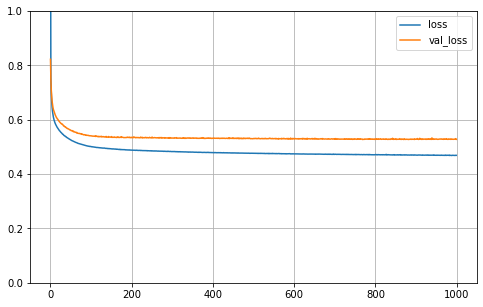

In [98]:
plot_history(history)

In [100]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_A)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [101]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9,0.1], optimizer='sgd')
history = model.fit([X_train_A, X_train_B], 
                    [y_train, y_train], 
                    epochs=20, 
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.4054 - main_output_loss: 1.2506 - aux_output_loss: 2.7984 - val_loss: 0.6496 - val_main_output_loss: 0.6364 - val_aux_output_loss: 0.7682
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6005 - main_output_loss: 0.5896 - aux_output_loss: 0.6986 - val_loss: 0.6113 - val_main_output_loss: 0.6023 - val_aux_output_loss: 0.6915
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6097 - main_output_loss: 0.6055 - aux_output_loss: 0.6476 - val_loss: 0.5978 - val_main_output_loss: 0.5912 - val_aux_output_loss: 0.6566
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6084 - main_output_loss: 0.6058 - aux_output_loss: 0.6320 - val_loss: 0.5922 - val_main_output_loss: 0.5870 - val_aux_output_loss: 0.6393
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5974 - main_output_loss: 0.5940 - aux_output_loss: 0.6283 - val_loss

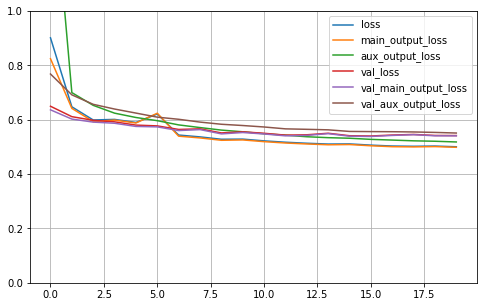

In [102]:
plot_history(history)

In [103]:
# this provides a lot of flexiblity, but limit keras ablity to check and summarize model
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A,input_B])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

In [104]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9,0.1], optimizer='sgd')
history = model.fit([X_train_A, X_train_B], 
                    [y_train, y_train], 
                    epochs=20, 
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.6108 - output_1_loss: 2.5231 - output_2_loss: 3.4007 - val_loss: 2.9713 - val_output_1_loss: 3.0439 - val_output_2_loss: 2.3175
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6827 - output_1_loss: 0.6149 - output_2_loss: 1.2928 - val_loss: 15.7573 - val_output_1_loss: 17.3532 - val_output_2_loss: 1.3939
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 1.1848 - output_1_loss: 1.1906 - output_2_loss: 1.1328 - val_loss: 6.1940 - val_output_1_loss: 6.7573 - val_output_2_loss: 1.1245
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7602 - output_1_loss: 0.7328 - output_2_loss: 1.0061 - val_loss: 0.9903 - val_output_1_loss: 0.9950 - val_output_2_loss: 0.9484
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6498 - output_1_loss: 0.6203 - output_2_loss: 0.9147 - val_loss: 0.8012 - val_output_1_loss: 0.7944 - val_

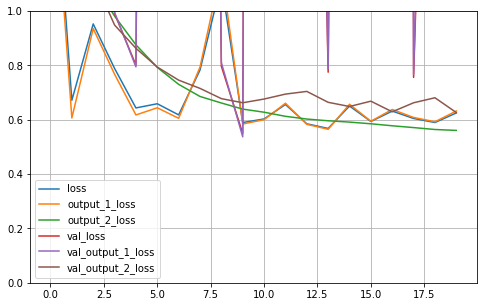

In [105]:
plot_history(history)

In [106]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [107]:
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
split_idx = 5000
# scale input between 0 and 1 for ANN
X_valid, X_train = X_train_full[split_idx:] / 255.0, X_train_full[:split_idx] / 255.0
y_valid, y_train = y_train_full[split_idx:], y_train_full[:split_idx]
X_test = X_test / 255.0

In [108]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
157/157 [==============================] - 2s 12ms/step - loss: 1.9259 - accuracy: 0.3972 - val_loss: 1.1509 - val_accuracy: 0.6307
Epoch 2/100
157/157 [==============================] - 2s 10ms/step - loss: 1.0343 - accuracy: 0.6761 - val_loss: 0.8703 - val_accuracy: 0.6947
Epoch 3/100
157/157 [==============================] - 2s 11ms/step - loss: 0.8045 - accuracy: 0.7265 - val_loss: 0.7750 - val_accuracy: 0.7277
Epoch 4/100
157/157 [==============================] - 2s 12ms/step - loss: 0.7237 - accuracy: 0.7604 - val_loss: 0.7279 - val_accuracy: 0.7415
Epoch 5/100
157/157 [==============================] - 2s 13ms/step - loss: 0.6429 - accuracy: 0.7779 - val_loss: 0.6538 - val_accuracy: 0.7702
Epoch 6/100
157/157 [==============================] - 2s 11ms/step - loss: 0.6014 - accuracy: 0.7904 - val_loss: 0.6386 - val_accuracy: 0.7833
Epoch 7/100
157/157 [==============================] - 2s 12ms/step - loss: 0.5716 - accuracy: 0.8078 - val_loss: 0.5932 - val_accuracy:

157/157 [==============================] - 2s 12ms/step - loss: 0.2480 - accuracy: 0.9146 - val_loss: 0.4602 - val_accuracy: 0.8450
Epoch 58/100
157/157 [==============================] - 2s 11ms/step - loss: 0.2577 - accuracy: 0.9170 - val_loss: 0.9543 - val_accuracy: 0.7589
Epoch 59/100
157/157 [==============================] - 2s 11ms/step - loss: 0.2524 - accuracy: 0.9153 - val_loss: 0.4614 - val_accuracy: 0.8460
Epoch 60/100
157/157 [==============================] - 2s 11ms/step - loss: 0.2346 - accuracy: 0.9221 - val_loss: 0.4494 - val_accuracy: 0.8465
Epoch 61/100
157/157 [==============================] - 2s 11ms/step - loss: 0.2255 - accuracy: 0.9220 - val_loss: 0.4956 - val_accuracy: 0.8387
Epoch 62/100
157/157 [==============================] - 2s 11ms/step - loss: 0.2266 - accuracy: 0.9224 - val_loss: 0.4555 - val_accuracy: 0.8480
Epoch 63/100
157/157 [==============================] - 2s 11ms/step - loss: 0.2146 - accuracy: 0.9315 - val_loss: 0.4555 - val_accuracy: 0.847

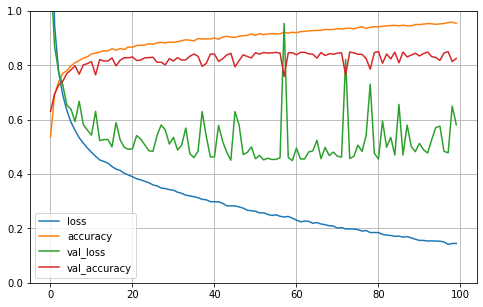

In [109]:
plot_history(history)

In [110]:
# need more complex method is subclassing
# save model 
model.save('fasion_mnist_model.h5')

In [111]:
# load model
model = kerasas.models.load_model('fasion_mnist_model.h5')

In [112]:
# checkpoint model incase the computer crashes
checkpoint_cb = keras.callbacks.ModelCheckpoint('fasion_mnist_model.h5')
history = model.fit(X_train, 
                    y_train, 
                    epochs=100, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb])

Epoch 1/100
157/157 [==============================] - 2s 11ms/step - loss: 0.1381 - accuracy: 0.9570 - val_loss: 0.4842 - val_accuracy: 0.8498
Epoch 2/100
157/157 [==============================] - 2s 10ms/step - loss: 0.1384 - accuracy: 0.9594 - val_loss: 0.4934 - val_accuracy: 0.8473
Epoch 3/100
157/157 [==============================] - 2s 10ms/step - loss: 0.1393 - accuracy: 0.9578 - val_loss: 0.8198 - val_accuracy: 0.7815
Epoch 4/100
157/157 [==============================] - 2s 11ms/step - loss: 0.1387 - accuracy: 0.9576 - val_loss: 0.9004 - val_accuracy: 0.7548
Epoch 5/100
157/157 [==============================] - 2s 15ms/step - loss: 0.1333 - accuracy: 0.9624 - val_loss: 0.5306 - val_accuracy: 0.8391
Epoch 6/100
157/157 [==============================] - 2s 12ms/step - loss: 0.1336 - accuracy: 0.9628 - val_loss: 0.4994 - val_accuracy: 0.8453
Epoch 7/100
157/157 [==============================] - 2s 10ms/step - loss: 0.1254 - accuracy: 0.9628 - val_loss: 0.5316 - val_accuracy:

157/157 [==============================] - 2s 11ms/step - loss: 0.0565 - accuracy: 0.9886 - val_loss: 0.5670 - val_accuracy: 0.8464
Epoch 58/100
157/157 [==============================] - 2s 12ms/step - loss: 0.0572 - accuracy: 0.9890 - val_loss: 0.7319 - val_accuracy: 0.8121
Epoch 59/100
157/157 [==============================] - 2s 11ms/step - loss: 0.0642 - accuracy: 0.9830 - val_loss: 0.5764 - val_accuracy: 0.8439
Epoch 60/100
157/157 [==============================] - 2s 11ms/step - loss: 0.0561 - accuracy: 0.9874 - val_loss: 0.7015 - val_accuracy: 0.8301
Epoch 61/100
157/157 [==============================] - 2s 11ms/step - loss: 0.0527 - accuracy: 0.9896 - val_loss: 0.6071 - val_accuracy: 0.8408
Epoch 62/100
157/157 [==============================] - 2s 11ms/step - loss: 0.0569 - accuracy: 0.9878 - val_loss: 0.8154 - val_accuracy: 0.8158
Epoch 63/100
157/157 [==============================] - 2s 11ms/step - loss: 0.0549 - accuracy: 0.9874 - val_loss: 0.5863 - val_accuracy: 0.843

In [113]:
# Avoid over training by only saving best model
checkpoint_cb = keras.callbacks.ModelCheckpoint('fasion_mnist_model.h5', save_best_only=True)
history = model.fit(X_train, 
                    y_train, 
                    epochs=100, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb])
# get best model
model = keras.models.load_models('fasion_mnist_model.h5')

Epoch 1/100
157/157 [==============================] - 2s 12ms/step - loss: 0.0263 - accuracy: 0.9976 - val_loss: 0.6311 - val_accuracy: 0.8466
Epoch 2/100
157/157 [==============================] - 2s 12ms/step - loss: 0.0258 - accuracy: 0.9974 - val_loss: 0.6367 - val_accuracy: 0.8468
Epoch 3/100
157/157 [==============================] - 2s 12ms/step - loss: 0.0261 - accuracy: 0.9974 - val_loss: 0.6402 - val_accuracy: 0.8451
Epoch 4/100
157/157 [==============================] - 2s 12ms/step - loss: 0.0250 - accuracy: 0.9972 - val_loss: 0.7914 - val_accuracy: 0.8342
Epoch 5/100
157/157 [==============================] - 2s 12ms/step - loss: 0.0263 - accuracy: 0.9966 - val_loss: 0.6469 - val_accuracy: 0.8461
Epoch 6/100
157/157 [==============================] - 2s 13ms/step - loss: 0.0229 - accuracy: 0.9982 - val_loss: 0.6493 - val_accuracy: 0.8446
Epoch 7/100
157/157 [==============================] - 2s 11ms/step - loss: 0.0227 - accuracy: 0.9980 - val_loss: 0.6562 - val_accuracy:

157/157 [==============================] - 2s 12ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.7240 - val_accuracy: 0.8445
Epoch 58/100
157/157 [==============================] - 2s 12ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.7124 - val_accuracy: 0.8460
Epoch 59/100
157/157 [==============================] - 2s 12ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.7111 - val_accuracy: 0.8458
Epoch 60/100
157/157 [==============================] - 2s 11ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.7142 - val_accuracy: 0.8466
Epoch 61/100
157/157 [==============================] - 2s 11ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.7148 - val_accuracy: 0.8459
Epoch 62/100
157/157 [==============================] - 2s 12ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.7185 - val_accuracy: 0.8453
Epoch 63/100
157/157 [==============================] - 2s 12ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.7146 - val_accuracy: 0.845

AttributeError: module 'tensorflow.keras.models' has no attribute 'load_models'

In [116]:
# impliment both checkpointing to avoid loosing data in a crash
# and early stopping to avoid waisting computer time
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('fasion_mnist_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, 
                    y_train, 
                    epochs=100, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
157/157 [==============================] - 2s 12ms/step - loss: 1.7551 - accuracy: 0.4815 - val_loss: 1.0320 - val_accuracy: 0.6747
Epoch 2/100
157/157 [==============================] - 2s 11ms/step - loss: 0.9110 - accuracy: 0.7034 - val_loss: 0.8019 - val_accuracy: 0.7413
Epoch 3/100
157/157 [==============================] - 2s 10ms/step - loss: 0.7518 - accuracy: 0.7547 - val_loss: 0.7098 - val_accuracy: 0.7662
Epoch 4/100
157/157 [==============================] - 1s 9ms/step - loss: 0.6573 - accuracy: 0.7774 - val_loss: 0.7020 - val_accuracy: 0.7628
Epoch 5/100
157/157 [==============================] - 1s 9ms/step - loss: 0.6174 - accuracy: 0.8029 - val_loss: 0.6422 - val_accuracy: 0.7836
Epoch 6/100
157/157 [==============================] - 1s 9ms/step - loss: 0.5692 - accuracy: 0.8098 - val_loss: 0.6233 - val_accuracy: 0.7877
Epoch 7/100
157/157 [==============================] - 2s 10ms/step - loss: 0.5339 - accuracy: 0.8215 - val_loss: 0.6180 - val_accuracy: 0.

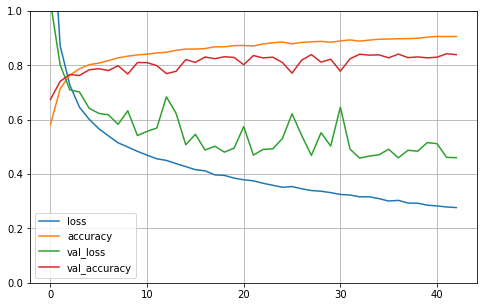

In [117]:
plot_history(history)

In [118]:
# define a custom callback 
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train:{:.2f}'.format(logs["val_loss"]/logs["loss"]))

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
print_train_ratio = PrintValTrainRatioCallback()
history = model.fit(X_train, 
                    y_train, 
                    epochs=100, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb, early_stopping_cb,print_train_ratio])



Epoch 1/100
157/157 [==============================] - 2s 12ms/step - loss: 1.8219 - accuracy: 0.4297 - val_loss: 1.0684 - val_accuracy: 0.6629

val/train:0.71
Epoch 2/100
157/157 [==============================] - 2s 11ms/step - loss: 0.9511 - accuracy: 0.7051 - val_loss: 0.8177 - val_accuracy: 0.7287

val/train:0.92
Epoch 3/100
157/157 [==============================] - 2s 12ms/step - loss: 0.7590 - accuracy: 0.7513 - val_loss: 0.7281 - val_accuracy: 0.7553

val/train:0.99
Epoch 4/100
157/157 [==============================] - 2s 11ms/step - loss: 0.6913 - accuracy: 0.7789 - val_loss: 0.8180 - val_accuracy: 0.7227

val/train:1.23
Epoch 5/100
157/157 [==============================] - 2s 11ms/step - loss: 0.6322 - accuracy: 0.8078 - val_loss: 0.6627 - val_accuracy: 0.7667

val/train:1.08
Epoch 6/100
157/157 [==============================] - 2s 11ms/step - loss: 0.5751 - accuracy: 0.8173 - val_loss: 0.6065 - val_accuracy: 0.7944

val/train:1.04
Epoch 7/100
157/157 [===================

In [119]:
# using TensorBoards
import os 
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)


Epoch 1/300
157/157 [==============================] - 2s 11ms/step - loss: 1.8250 - accuracy: 0.4269 - val_loss: 1.0743 - val_accuracy: 0.6822
Epoch 2/300
157/157 [==============================] - 2s 10ms/step - loss: 0.9632 - accuracy: 0.7157 - val_loss: 0.8128 - val_accuracy: 0.7392
Epoch 3/300
157/157 [==============================] - 1s 10ms/step - loss: 0.7617 - accuracy: 0.7676 - val_loss: 0.7750 - val_accuracy: 0.7244
Epoch 4/300
157/157 [==============================] - 2s 10ms/step - loss: 0.6662 - accuracy: 0.7907 - val_loss: 0.6596 - val_accuracy: 0.7796
Epoch 5/300
157/157 [==============================] - 2s 14ms/step - loss: 0.5984 - accuracy: 0.8047 - val_loss: 0.6659 - val_accuracy: 0.7717
Epoch 6/300
157/157 [==============================] - 2s 12ms/step - loss: 0.5591 - accuracy: 0.8202 - val_loss: 0.6302 - val_accuracy: 0.7810
Epoch 7/300
157/157 [==============================] - 2s 12ms/step - loss: 0.5718 - accuracy: 0.8129 - val_loss: 0.6031 - val_accuracy:

157/157 [==============================] - 2s 13ms/step - loss: 0.2294 - accuracy: 0.9254 - val_loss: 0.4803 - val_accuracy: 0.8365
Epoch 58/300
157/157 [==============================] - 2s 12ms/step - loss: 0.2369 - accuracy: 0.9240 - val_loss: 0.6751 - val_accuracy: 0.7698
Epoch 59/300
157/157 [==============================] - 2s 12ms/step - loss: 0.2318 - accuracy: 0.9246 - val_loss: 0.6350 - val_accuracy: 0.7907
Epoch 60/300
157/157 [==============================] - 2s 12ms/step - loss: 0.2244 - accuracy: 0.9292 - val_loss: 0.4514 - val_accuracy: 0.8483
Epoch 61/300
157/157 [==============================] - 2s 12ms/step - loss: 0.2101 - accuracy: 0.9383 - val_loss: 0.4802 - val_accuracy: 0.8416
Epoch 62/300
157/157 [==============================] - 2s 12ms/step - loss: 0.2073 - accuracy: 0.9332 - val_loss: 0.7464 - val_accuracy: 0.7652
Epoch 63/300
157/157 [==============================] - 2s 13ms/step - loss: 0.2204 - accuracy: 0.9257 - val_loss: 0.6664 - val_accuracy: 0.794

In [120]:
run_logdir = get_run_logdir()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('fasion_mnist_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, 
                    y_train, 
                    epochs=300, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/300
157/157 [==============================] - 2s 13ms/step - loss: 1.8089 - accuracy: 0.4948 - val_loss: 1.0555 - val_accuracy: 0.6602
Epoch 2/300
157/157 [==============================] - 2s 11ms/step - loss: 0.9582 - accuracy: 0.6884 - val_loss: 0.8268 - val_accuracy: 0.7296
Epoch 3/300
157/157 [==============================] - 2s 11ms/step - loss: 0.7592 - accuracy: 0.7510 - val_loss: 0.7432 - val_accuracy: 0.7346
Epoch 4/300
157/157 [==============================] - 2s 10ms/step - loss: 0.7042 - accuracy: 0.7501 - val_loss: 0.6978 - val_accuracy: 0.7625
Epoch 5/300
157/157 [==============================] - 2s 11ms/step - loss: 0.6256 - accuracy: 0.7911 - val_loss: 0.6533 - val_accuracy: 0.7697
Epoch 6/300
157/157 [==============================] - 2s 11ms/step - loss: 0.5901 - accuracy: 0.8053 - val_loss: 0.6233 - val_accuracy: 0.7772
Epoch 7/300
157/157 [==============================] - 2s 11ms/step - loss: 0.5628 - accuracy: 0.8126 - val_loss: 0.7083 - val_accuracy:

157/157 [==============================] - 2s 13ms/step - loss: 0.2415 - accuracy: 0.9187 - val_loss: 0.4648 - val_accuracy: 0.8451
Epoch 58/300
157/157 [==============================] - 2s 13ms/step - loss: 0.2415 - accuracy: 0.9181 - val_loss: 0.4726 - val_accuracy: 0.8431
Epoch 59/300
157/157 [==============================] - 2s 12ms/step - loss: 0.2319 - accuracy: 0.9229 - val_loss: 0.4733 - val_accuracy: 0.8438
Epoch 60/300
157/157 [==============================] - 2s 12ms/step - loss: 0.2317 - accuracy: 0.9223 - val_loss: 0.4758 - val_accuracy: 0.8380
Epoch 61/300
157/157 [==============================] - 2s 12ms/step - loss: 0.2278 - accuracy: 0.9247 - val_loss: 0.4969 - val_accuracy: 0.8337
Epoch 62/300
157/157 [==============================] - 2s 12ms/step - loss: 0.2257 - accuracy: 0.9295 - val_loss: 0.6198 - val_accuracy: 0.7919
Epoch 63/300
157/157 [==============================] - 2s 12ms/step - loss: 0.2235 - accuracy: 0.9297 - val_loss: 0.5713 - val_accuracy: 0.807

In [124]:
# creating a summary writer
# use `tensorboard logdir=./my_logs port=6006` to visualize
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1,1000+1):
        tf.summary.scalar('my_scalar', np.sin(step/10), step=step)
        data = (np.random.randn(100) + 2) * step / 100
        tf.summary.histogram('my_hist', data, buckets=50, step=step)
        images = np.random.rand(2,32,32,3)
        tf.summary.image('my_images', images*step/100, step=step)
        text = ['The step is' + str(step), 'Its square is' + str(step**2)]
        tf.summary.text('my_text', text, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step=step)

In [125]:
# doing grid search or randomized search with keras
def build_model(n_hidden=1, n_neurons=30, learning_rate = 3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model


In [129]:
# get data
housing = fetch_california_housing()
# split data
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# scale input
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_new = X_test[:3]

In [131]:
# make sklearn like regressor
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)
print(mse_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.6047 - val_loss: 0.7649
Epoch 2/100
363/363 [==============================] - 0s 900us/step - loss: 0.6743 - val_loss: 0.6651
Epoch 3/100
363/363 [==============================] - 0s 825us/step - loss: 0.5922 - val_loss: 0.6028
Epoch 4/100
363/363 [==============================] - 0s 899us/step - loss: 0.5585 - val_loss: 0.5663
Epoch 5/100
363/363 [==============================] - 0s 890us/step - loss: 0.5101 - val_loss: 0.5517
Epoch 6/100
363/363 [==============================] - 0s 898us/step - loss: 0.4954 - val_loss: 0.5303
Epoch 7/100
363/363 [==============================] - 0s 886us/step - loss: 0.4880 - val_loss: 0.5236
Epoch 8/100
363/363 [==============================] - 0s 896us/step - loss: 0.4632 - val_loss: 0.5174
Epoch 9/100
363/363 [==============================] - 0s 823us/step - loss: 0.4598 - val_loss: 0.5034
Epoch 10/100
363/363 [==============================] - 0s 838us/step - los

363/363 [==============================] - 0s 833us/step - loss: 0.3476 - val_loss: 0.3852
Epoch 81/100
363/363 [==============================] - 0s 851us/step - loss: 0.3437 - val_loss: 0.3851
Epoch 82/100
363/363 [==============================] - 0s 918us/step - loss: 0.3483 - val_loss: 0.3839
Epoch 83/100
363/363 [==============================] - 0s 899us/step - loss: 0.3531 - val_loss: 0.3844
Epoch 84/100
363/363 [==============================] - 0s 830us/step - loss: 0.3496 - val_loss: 0.3855
Epoch 85/100
363/363 [==============================] - 0s 914us/step - loss: 0.3558 - val_loss: 0.4591
Epoch 86/100
363/363 [==============================] - 0s 957us/step - loss: 0.3640 - val_loss: 0.3850
Epoch 87/100
363/363 [==============================] - 0s 773us/step - loss: 0.3583 - val_loss: 0.3827
Epoch 88/100
363/363 [==============================] - 0s 889us/step - loss: 0.3571 - val_loss: 0.3821
Epoch 89/100
363/363 [==============================] - 0s 923us/step - loss:

In [132]:
from scipy.stats import reciprocal # this is a random variable tool
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1,100),
    'learning_rate': reciprocal(3e-4,3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
# preforming CV, so the "valid" set is only used for early stopping
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])


Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 2.2009 - val_loss: 0.6243
Epoch 2/100
242/242 [==============================] - 0s 858us/step - loss: 0.7240 - val_loss: 0.5877
Epoch 3/100
242/242 [==============================] - 0s 863us/step - loss: 0.5409 - val_loss: 0.5679
Epoch 4/100
242/242 [==============================] - 0s 870us/step - loss: 0.5505 - val_loss: 0.5651
Epoch 5/100
242/242 [==============================] - 0s 862us/step - loss: 0.5265 - val_loss: 0.5747
Epoch 6/100
242/242 [==============================] - 0s 887us/step - loss: 0.5225 - val_loss: 0.5791
Epoch 7/100
242/242 [==============================] - 0s 863us/step - loss: 0.5176 - val_loss: 0.5630
Epoch 8/100
242/242 [==============================] - 0s 822us/step - loss: 0.5214 - val_loss: 0.5745
Epoch 9/100
242/242 [==============================] - 0s 846us/step - loss: 0.5190 - val_loss: 0.5803
Epoch 10/100
242/242 [==============================] - 0s 909us/step - los

242/242 [==============================] - 0s 1ms/step - loss: 0.5885 - val_loss: 0.5549
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4866 - val_loss: 0.5063
Epoch 4/100
242/242 [==============================] - 0s 988us/step - loss: 0.4550 - val_loss: 0.4908
Epoch 5/100
242/242 [==============================] - 0s 999us/step - loss: 0.4748 - val_loss: 0.4765
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4343 - val_loss: 0.4793
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4424 - val_loss: 0.4638
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4253 - val_loss: 0.4467
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4147 - val_loss: 0.4465
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3919 - val_loss: 0.4453
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3887 - val_loss: 0.4

242/242 [==============================] - 0s 1ms/step - loss: 0.2831 - val_loss: 0.3409
Epoch 83/100
242/242 [==============================] - 0s 998us/step - loss: 0.2683 - val_loss: 0.3209
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2727 - val_loss: 0.3260
Epoch 85/100
242/242 [==============================] - 1s 4ms/step - loss: 0.2736 - val_loss: 0.3210
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2742 - val_loss: 0.3224
Epoch 87/100
242/242 [==============================] - 0s 928us/step - loss: 0.2668 - val_loss: 0.3246
Epoch 88/100
242/242 [==============================] - 0s 991us/step - loss: 0.2706 - val_loss: 0.3228
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2725 - val_loss: 0.3230
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2754 - val_loss: 0.3215
Epoch 91/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2693 - val_

242/242 [==============================] - 0s 1ms/step - loss: 0.3057 - val_loss: 0.3488
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2830 - val_loss: 0.3388
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2918 - val_loss: 0.3408
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3016 - val_loss: 0.3372
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2935 - val_loss: 0.3450
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2981 - val_loss: 0.4850
Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3138 - val_loss: 0.3336
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2909 - val_loss: 0.3501
Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2896 - val_loss: 0.3359
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2822 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3181 - val_loss: 0.3901
Epoch 41/100
242/242 [==============================] - 0s 996us/step - loss: 0.3077 - val_loss: 0.3597
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3387 - val_loss: 0.3606
Epoch 43/100
242/242 [==============================] - 0s 971us/step - loss: 0.3236 - val_loss: 0.3528
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3142 - val_loss: 0.3594
Epoch 45/100
242/242 [==============================] - 0s 976us/step - loss: 0.3332 - val_loss: 0.3470
Epoch 46/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3304 - val_loss: 0.3465
Epoch 47/100
242/242 [==============================] - 0s 934us/step - loss: 0.3236 - val_loss: 0.3486
Epoch 48/100
242/242 [==============================] - 0s 957us/step - loss: 0.3008 - val_loss: 0.3422
Epoch 49/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3017 - 

242/242 [==============================] - 0s 1ms/step - loss: 0.4724 - val_loss: 0.5047
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4413 - val_loss: 0.5000
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4611 - val_loss: 0.4974
Epoch 25/100
242/242 [==============================] - 0s 990us/step - loss: 0.4555 - val_loss: 0.4938
Epoch 26/100
242/242 [==============================] - 0s 994us/step - loss: 0.4460 - val_loss: 0.4894
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4445 - val_loss: 0.4858
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4306 - val_loss: 0.4831
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4348 - val_loss: 0.4819
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4316 - val_loss: 0.4777
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4358 - val_lo

242/242 [==============================] - 1s 2ms/step - loss: 4.3220 - val_loss: 1.4366
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 1.0647 - val_loss: 0.9119
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7677 - val_loss: 0.7851
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6914 - val_loss: 0.7363
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.7103
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6524 - val_loss: 0.6906
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6099 - val_loss: 0.6720
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5870 - val_loss: 0.6559
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6094 - val_loss: 0.6423
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6138 - val_loss: 0.6309
E

242/242 [==============================] - 0s 1ms/step - loss: 0.3943 - val_loss: 0.4222
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3720 - val_loss: 0.4187
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3442 - val_loss: 0.4198
Epoch 84/100
242/242 [==============================] - 0s 975us/step - loss: 0.3822 - val_loss: 0.4176
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3894 - val_loss: 0.4172
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3654 - val_loss: 0.4175
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3802 - val_loss: 0.4160
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3765 - val_loss: 0.4143
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3596 - val_loss: 0.4147
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3865 - val_loss

Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3881 - val_loss: 0.4302
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3857 - val_loss: 0.4291
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3815 - val_loss: 0.4277
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4041 - val_loss: 0.4265
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3814 - val_loss: 0.4276
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3967 - val_loss: 0.4255
Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3862 - val_loss: 0.4251
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3887 - val_loss: 0.4249
Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3978 - val_loss: 0.4239
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3886

242/242 [==============================] - 0s 1ms/step - loss: 0.3231 - val_loss: 0.3668
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3208 - val_loss: 0.3564
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3177 - val_loss: 0.3714
Epoch 43/100
242/242 [==============================] - 0s 926us/step - loss: 0.3259 - val_loss: 0.3631
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3196 - val_loss: 0.3614
Epoch 45/100
242/242 [==============================] - 0s 972us/step - loss: 0.3121 - val_loss: 0.3629
Epoch 46/100
242/242 [==============================] - 0s 918us/step - loss: 0.2945 - val_loss: 0.3488
Epoch 47/100
242/242 [==============================] - 0s 942us/step - loss: 0.3071 - val_loss: 0.3651
Epoch 48/100
242/242 [==============================] - 0s 934us/step - loss: 0.3174 - val_loss: 0.3535
Epoch 49/100
242/242 [==============================] - 0s 917us/step - loss: 0.3173 

242/242 [==============================] - 0s 1ms/step - loss: 0.3405 - val_loss: 0.3935
Epoch 20/100
242/242 [==============================] - 0s 953us/step - loss: 0.3358 - val_loss: 0.3844
Epoch 21/100
242/242 [==============================] - 0s 968us/step - loss: 0.3297 - val_loss: 0.3863
Epoch 22/100
242/242 [==============================] - 0s 950us/step - loss: 0.3457 - val_loss: 0.3803
Epoch 23/100
242/242 [==============================] - 0s 946us/step - loss: 0.3323 - val_loss: 0.3799
Epoch 24/100
242/242 [==============================] - 0s 938us/step - loss: 0.3500 - val_loss: 0.3800
Epoch 25/100
242/242 [==============================] - 0s 968us/step - loss: 0.3382 - val_loss: 0.3756
Epoch 26/100
242/242 [==============================] - 0s 927us/step - loss: 0.3239 - val_loss: 0.3732
Epoch 27/100
242/242 [==============================] - 0s 986us/step - loss: 0.3351 - val_loss: 0.3720
Epoch 28/100
242/242 [==============================] - 0s 935us/step - loss: 0

Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3601 - val_loss: 0.3918
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3472 - val_loss: 0.3899
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3598 - val_loss: 0.3839
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3539 - val_loss: 0.3857
Epoch 28/100
242/242 [==============================] - 0s 998us/step - loss: 0.3480 - val_loss: 0.3769
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3390 - val_loss: 0.3731
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3422 - val_loss: 0.3790
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3339 - val_loss: 0.3762
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3545 - val_loss: 0.3667
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.32

242/242 [==============================] - 0s 1ms/step - loss: 0.7030 - val_loss: 0.7417
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6564 - val_loss: 0.7071
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6647 - val_loss: 0.6846
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6015 - val_loss: 0.6612
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5983 - val_loss: 0.6431
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5774 - val_loss: 0.6273
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5661 - val_loss: 0.6108
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5339 - val_loss: 0.5968
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5508 - val_loss: 0.5851
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5026 - val_loss: 0.5750

242/242 [==============================] - 0s 1ms/step - loss: 0.3421 - val_loss: 0.3929
Epoch 84/100
242/242 [==============================] - 0s 929us/step - loss: 0.3434 - val_loss: 0.3898
Epoch 85/100
242/242 [==============================] - 0s 940us/step - loss: 0.3336 - val_loss: 0.3898
Epoch 86/100
242/242 [==============================] - 0s 937us/step - loss: 0.3337 - val_loss: 0.3877
Epoch 87/100
242/242 [==============================] - 0s 949us/step - loss: 0.3392 - val_loss: 0.3891
Epoch 88/100
242/242 [==============================] - 0s 939us/step - loss: 0.3391 - val_loss: 0.3904
Epoch 89/100
242/242 [==============================] - 0s 935us/step - loss: 0.3377 - val_loss: 0.3859
Epoch 90/100
242/242 [==============================] - 0s 957us/step - loss: 0.3344 - val_loss: 0.3845
Epoch 91/100
242/242 [==============================] - 0s 941us/step - loss: 0.3293 - val_loss: 0.3843
Epoch 92/100
242/242 [==============================] - 0s 960us/step - loss: 0

Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3661 - val_loss: 0.4088
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3818 - val_loss: 0.4064
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3716 - val_loss: 0.4063
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3576 - val_loss: 0.4061
Epoch 66/100
242/242 [==============================] - 0s 967us/step - loss: 0.3774 - val_loss: 0.4036
Epoch 67/100
242/242 [==============================] - 0s 986us/step - loss: 0.3521 - val_loss: 0.4036
Epoch 68/100
242/242 [==============================] - 0s 994us/step - loss: 0.3615 - val_loss: 0.4022
Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3605 - val_loss: 0.4017
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3665 - val_loss: 0.4003
Epoch 71/100
242/242 [==============================] - 0s 1ms/step - loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3956 - val_loss: 0.4225
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4005 - val_loss: 0.4224
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3765 - val_loss: 0.4179
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3895 - val_loss: 0.4182
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3782 - val_loss: 0.4145
Epoch 46/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3945 - val_loss: 0.4130
Epoch 47/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3756 - val_loss: 0.4140
Epoch 48/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3922 - val_loss: 0.4124
Epoch 49/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3644 - val_loss: 0.4121
Epoch 50/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3881 - val_loss: 

Epoch 20/100
242/242 [==============================] - 0s 846us/step - loss: 0.5313 - val_loss: 0.5751
Epoch 21/100
242/242 [==============================] - 0s 810us/step - loss: 0.5088 - val_loss: 0.5742
Epoch 22/100
242/242 [==============================] - 0s 853us/step - loss: 0.5167 - val_loss: 0.5736
Epoch 23/100
242/242 [==============================] - 0s 848us/step - loss: 0.5273 - val_loss: 0.5727
Epoch 24/100
242/242 [==============================] - 0s 852us/step - loss: 0.5176 - val_loss: 0.5725
Epoch 25/100
242/242 [==============================] - 0s 837us/step - loss: 0.5164 - val_loss: 0.5723
Epoch 26/100
242/242 [==============================] - 0s 827us/step - loss: 0.5073 - val_loss: 0.5718
Epoch 27/100
242/242 [==============================] - 0s 830us/step - loss: 0.5235 - val_loss: 0.5710
Epoch 28/100
242/242 [==============================] - 0s 840us/step - loss: 0.5260 - val_loss: 0.5703
Epoch 29/100
242/242 [==============================] - 0s 855us

Epoch 99/100
242/242 [==============================] - 0s 804us/step - loss: 0.5319 - val_loss: 0.5639
Epoch 100/100
121/121 [==============================] - 0s 431us/step - loss: 0.5192
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 4.9951 - val_loss: 3.5102
Epoch 2/100
242/242 [==============================] - 0s 786us/step - loss: 3.0816 - val_loss: 2.3067
Epoch 3/100
242/242 [==============================] - 0s 783us/step - loss: 2.1163 - val_loss: 1.6299
Epoch 4/100
242/242 [==============================] - 0s 800us/step - loss: 1.4326 - val_loss: 1.2409
Epoch 5/100
242/242 [==============================] - 0s 820us/step - loss: 1.0449 - val_loss: 1.0134
Epoch 6/100
242/242 [==============================] - 0s 799us/step - loss: 0.8518 - val_loss: 0.8772
Epoch 7/100
242/242 [==============================] - 0s 884us/step - loss: 0.7435 - val_loss: 0.7939
Epoch 8/100
242/242 [==============================] - 0s 816us/step - loss: 0.6989 - val_l

242/242 [==============================] - 0s 859us/step - loss: 0.4890 - val_loss: 0.5969
Epoch 78/100
242/242 [==============================] - 0s 850us/step - loss: 0.5218 - val_loss: 0.5951
Epoch 79/100
242/242 [==============================] - 0s 838us/step - loss: 0.5185 - val_loss: 0.5960
Epoch 80/100
242/242 [==============================] - 0s 821us/step - loss: 0.4743 - val_loss: 0.5956
Epoch 81/100
242/242 [==============================] - 0s 848us/step - loss: 0.5519 - val_loss: 0.5948
Epoch 82/100
242/242 [==============================] - 0s 849us/step - loss: 0.4950 - val_loss: 0.5954
Epoch 83/100
242/242 [==============================] - 0s 898us/step - loss: 0.5093 - val_loss: 0.5938
Epoch 84/100
242/242 [==============================] - 0s 920us/step - loss: 0.5155 - val_loss: 0.5951
Epoch 85/100
242/242 [==============================] - 0s 843us/step - loss: 0.5367 - val_loss: 0.5946
Epoch 86/100
242/242 [==============================] - 0s 831us/step - loss:

242/242 [==============================] - 0s 854us/step - loss: 0.5154 - val_loss: 0.5695
Epoch 57/100
242/242 [==============================] - 0s 823us/step - loss: 0.5220 - val_loss: 0.5693
Epoch 58/100
242/242 [==============================] - 0s 821us/step - loss: 0.5204 - val_loss: 0.5695
Epoch 59/100
242/242 [==============================] - 0s 836us/step - loss: 0.5263 - val_loss: 0.5698
Epoch 60/100
242/242 [==============================] - 0s 852us/step - loss: 0.5021 - val_loss: 0.5695
Epoch 61/100
242/242 [==============================] - 0s 849us/step - loss: 0.5094 - val_loss: 0.5681
Epoch 62/100
242/242 [==============================] - 0s 828us/step - loss: 0.5155 - val_loss: 0.5676
Epoch 63/100
242/242 [==============================] - 0s 839us/step - loss: 0.5037 - val_loss: 0.5673
Epoch 64/100
242/242 [==============================] - 0s 819us/step - loss: 0.5120 - val_loss: 0.5682
Epoch 65/100
242/242 [==============================] - 0s 829us/step - loss:

242/242 [==============================] - 0s 851us/step - loss: 0.5131 - val_loss: 0.5636
Epoch 47/100
242/242 [==============================] - 0s 834us/step - loss: 0.5222 - val_loss: 0.5634
Epoch 48/100
242/242 [==============================] - 0s 836us/step - loss: 0.5050 - val_loss: 0.5632
Epoch 49/100
242/242 [==============================] - 0s 834us/step - loss: 0.5122 - val_loss: 0.5632
Epoch 50/100
242/242 [==============================] - 0s 837us/step - loss: 0.5167 - val_loss: 0.5629
Epoch 51/100
242/242 [==============================] - 0s 836us/step - loss: 0.5203 - val_loss: 0.5628
Epoch 52/100
242/242 [==============================] - 0s 835us/step - loss: 0.4941 - val_loss: 0.5626
Epoch 53/100
242/242 [==============================] - 0s 830us/step - loss: 0.4967 - val_loss: 0.5625
Epoch 54/100
242/242 [==============================] - 0s 879us/step - loss: 0.5173 - val_loss: 0.5625
Epoch 55/100
242/242 [==============================] - 0s 880us/step - loss:

242/242 [==============================] - 0s 907us/step - loss: 0.4982 - val_loss: 0.5718
Epoch 31/100
242/242 [==============================] - 0s 838us/step - loss: 0.5268 - val_loss: 0.5712
Epoch 32/100
242/242 [==============================] - 0s 841us/step - loss: 0.5514 - val_loss: 0.5712
Epoch 33/100
242/242 [==============================] - 0s 828us/step - loss: 0.5223 - val_loss: 0.5710
Epoch 34/100
242/242 [==============================] - 0s 822us/step - loss: 0.5069 - val_loss: 0.5710
Epoch 35/100
242/242 [==============================] - 0s 832us/step - loss: 0.5317 - val_loss: 0.5707
Epoch 36/100
242/242 [==============================] - 0s 841us/step - loss: 0.5083 - val_loss: 0.5706
Epoch 37/100
242/242 [==============================] - 0s 852us/step - loss: 0.5016 - val_loss: 0.5704
Epoch 38/100
242/242 [==============================] - 0s 836us/step - loss: 0.5117 - val_loss: 0.5702
Epoch 39/100
242/242 [==============================] - 0s 863us/step - loss:

242/242 [==============================] - 0s 884us/step - loss: 0.5320 - val_loss: 0.6008
Epoch 52/100
242/242 [==============================] - 0s 878us/step - loss: 0.5543 - val_loss: 0.5996
Epoch 53/100
242/242 [==============================] - 0s 880us/step - loss: 0.5540 - val_loss: 0.5985
Epoch 54/100
242/242 [==============================] - 0s 875us/step - loss: 0.5405 - val_loss: 0.5973
Epoch 55/100
242/242 [==============================] - 0s 870us/step - loss: 0.5515 - val_loss: 0.5961
Epoch 56/100
242/242 [==============================] - 0s 855us/step - loss: 0.5425 - val_loss: 0.5951
Epoch 57/100
242/242 [==============================] - 0s 857us/step - loss: 0.5594 - val_loss: 0.5938
Epoch 58/100
242/242 [==============================] - 0s 837us/step - loss: 0.5495 - val_loss: 0.5929
Epoch 59/100
242/242 [==============================] - 0s 828us/step - loss: 0.5612 - val_loss: 0.5920
Epoch 60/100
242/242 [==============================] - 0s 816us/step - loss:

242/242 [==============================] - 0s 1ms/step - loss: 0.3984 - val_loss: 0.4359
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3932 - val_loss: 0.4344
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3885 - val_loss: 0.4330
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3885 - val_loss: 0.4321
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3797 - val_loss: 0.4277
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3843 - val_loss: 0.4286
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3833 - val_loss: 0.4235
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3868 - val_loss: 0.4201
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3777 - val_loss: 0.4197
Epoch 38/100
242/242 [==============================] - 0s 998us/step - loss: 0.3734 - val_loss

242/242 [==============================] - 0s 958us/step - loss: 0.5103 - val_loss: 0.5312
Epoch 9/100
242/242 [==============================] - 0s 921us/step - loss: 0.4850 - val_loss: 0.5238
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4648 - val_loss: 0.5097
Epoch 11/100
242/242 [==============================] - 0s 984us/step - loss: 0.4490 - val_loss: 0.4924
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4554 - val_loss: 0.4860
Epoch 13/100
242/242 [==============================] - 0s 931us/step - loss: 0.4336 - val_loss: 0.4822
Epoch 14/100
242/242 [==============================] - 0s 933us/step - loss: 0.4261 - val_loss: 0.4821
Epoch 15/100
242/242 [==============================] - 0s 921us/step - loss: 0.4405 - val_loss: 0.4744
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4137 - val_loss: 0.4611
Epoch 17/100
242/242 [==============================] - 0s 947us/step - loss: 0.4338

242/242 [==============================] - 0s 1ms/step - loss: 0.3093 - val_loss: 0.3525
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3151 - val_loss: 0.3591
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3263 - val_loss: 0.3571
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3117 - val_loss: 0.3520
Epoch 91/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2994 - val_loss: 0.3502
Epoch 92/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2988 - val_loss: 0.3517
Epoch 93/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2952 - val_loss: 0.3600
Epoch 94/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2955 - val_loss: 0.3481
Epoch 95/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3036 - val_loss: 0.3466
Epoch 96/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3005 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3461 - val_loss: 0.3721
Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3372 - val_loss: 0.3719
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3372 - val_loss: 0.3697
Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3342 - val_loss: 0.3724
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3211 - val_loss: 0.3739
Epoch 71/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3252 - val_loss: 0.3652
Epoch 72/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3229 - val_loss: 0.3658
Epoch 73/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3577 - val_loss: 0.3663
Epoch 74/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3193 - val_loss: 0.3607
Epoch 75/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3277 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3434 - val_loss: 0.3720
Epoch 46/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3359 - val_loss: 0.3681
Epoch 47/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3400 - val_loss: 0.3676
Epoch 48/100
242/242 [==============================] - 0s 995us/step - loss: 0.3405 - val_loss: 0.3700
Epoch 49/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3160 - val_loss: 0.3643
Epoch 50/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3198 - val_loss: 0.3636
Epoch 51/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3118 - val_loss: 0.3638
Epoch 52/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3196 - val_loss: 0.3614
Epoch 53/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3114 - val_loss: 0.3640
Epoch 54/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3173 - val_loss

242/242 [==============================] - 0s 1ms/step - loss: 0.3549 - val_loss: 0.4140
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3593 - val_loss: 0.4119
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3726 - val_loss: 0.4109
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3471 - val_loss: 0.4100
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3739 - val_loss: 0.4088
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3680 - val_loss: 0.4070
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3502 - val_loss: 0.4007
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3674 - val_loss: 0.4082
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3524 - val_loss: 0.3940
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3479 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.6515 - val_loss: 0.6387
Epoch 4/100
242/242 [==============================] - 0s 956us/step - loss: 0.5595 - val_loss: 0.5978
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5463 - val_loss: 0.5693
Epoch 6/100
242/242 [==============================] - 0s 948us/step - loss: 0.5180 - val_loss: 0.5444
Epoch 7/100
242/242 [==============================] - 0s 964us/step - loss: 0.4998 - val_loss: 0.5237
Epoch 8/100
242/242 [==============================] - 0s 987us/step - loss: 0.4753 - val_loss: 0.5105
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4819 - val_loss: 0.4992
Epoch 10/100
242/242 [==============================] - 0s 992us/step - loss: 0.4333 - val_loss: 0.4831
Epoch 11/100
242/242 [==============================] - 0s 989us/step - loss: 0.4671 - val_loss: 0.4759
Epoch 12/100
242/242 [==============================] - 0s 966us/step - loss: 0.4431 - va

242/242 [==============================] - 0s 1ms/step - loss: 0.2943 - val_loss: 0.3420
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2920 - val_loss: 0.3406
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2963 - val_loss: 0.3386
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2962 - val_loss: 0.3386
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2852 - val_loss: 0.3394
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2930 - val_loss: 0.3364
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2921 - val_loss: 0.3358
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2891 - val_loss: 0.3338
Epoch 91/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2861 - val_loss: 0.3361
Epoch 92/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2831 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3049 - val_loss: 0.3372
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2884 - val_loss: 0.3452
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2937 - val_loss: 0.3325
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2987 - val_loss: 0.3534
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2943 - val_loss: 0.3571
Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2978 - val_loss: 0.3385
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2924 - val_loss: 0.3339
Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2875 - val_loss: 0.3358
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3073 - val_loss: 0.3344
Epoch 71/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3001 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3016 - val_loss: 0.3462
Epoch 52/100
242/242 [==============================] - 0s 967us/step - loss: 0.3243 - val_loss: 0.3386
Epoch 53/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3005 - val_loss: 0.3412
Epoch 54/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3170 - val_loss: 0.3420
Epoch 55/100
242/242 [==============================] - 0s 965us/step - loss: 0.3099 - val_loss: 0.3366
Epoch 56/100
242/242 [==============================] - 0s 954us/step - loss: 0.3018 - val_loss: 0.3381
Epoch 57/100
242/242 [==============================] - 0s 947us/step - loss: 0.3014 - val_loss: 0.3432
Epoch 58/100
242/242 [==============================] - 0s 924us/step - loss: 0.2875 - val_loss: 0.3411
Epoch 59/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3050 - val_loss: 0.3524
Epoch 60/100
242/242 [==============================] - 0s 959us/step - loss: 0.2974 

242/242 [==============================] - 0s 1ms/step - loss: 0.3458 - val_loss: 0.3791
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3461 - val_loss: 0.3813
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3230 - val_loss: 0.3915
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3315 - val_loss: 0.3703
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3300 - val_loss: 0.3674
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3284 - val_loss: 0.3800
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3422 - val_loss: 0.3618
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3490 - val_loss: 0.3694
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3329 - val_loss: 0.3641
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3327 - val_loss: 

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7ff513591dd0>, as the constructor either does not set or modifies parameter learning_rate

In [133]:
rnd_search_cv.best_params_

{'learning_rate': 0.008709746323173236, 'n_hidden': 2, 'n_neurons': 28}

In [134]:
rnd_search_cv.best_score_

-0.3139807879924774